## Ronan Jasper G. Reponte
Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

In [12]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import warnings
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Exploration

**TASK: Create a correlation heatmap.**

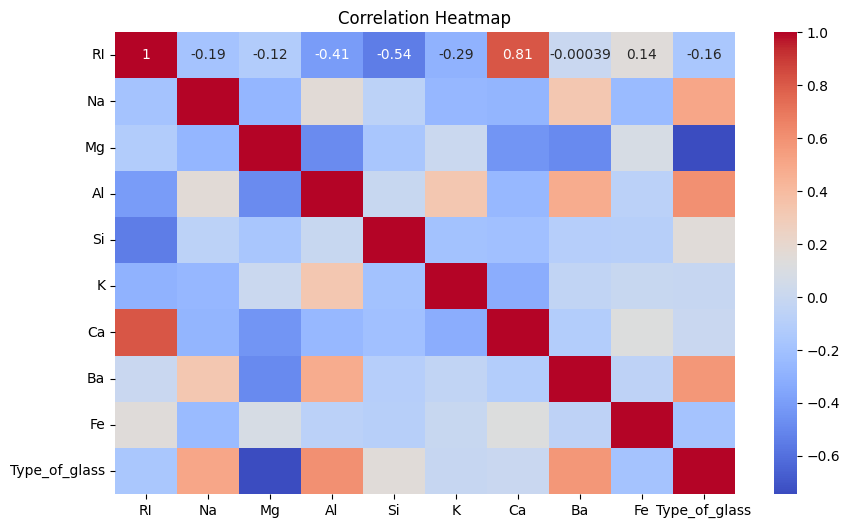

In [10]:
# Create the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

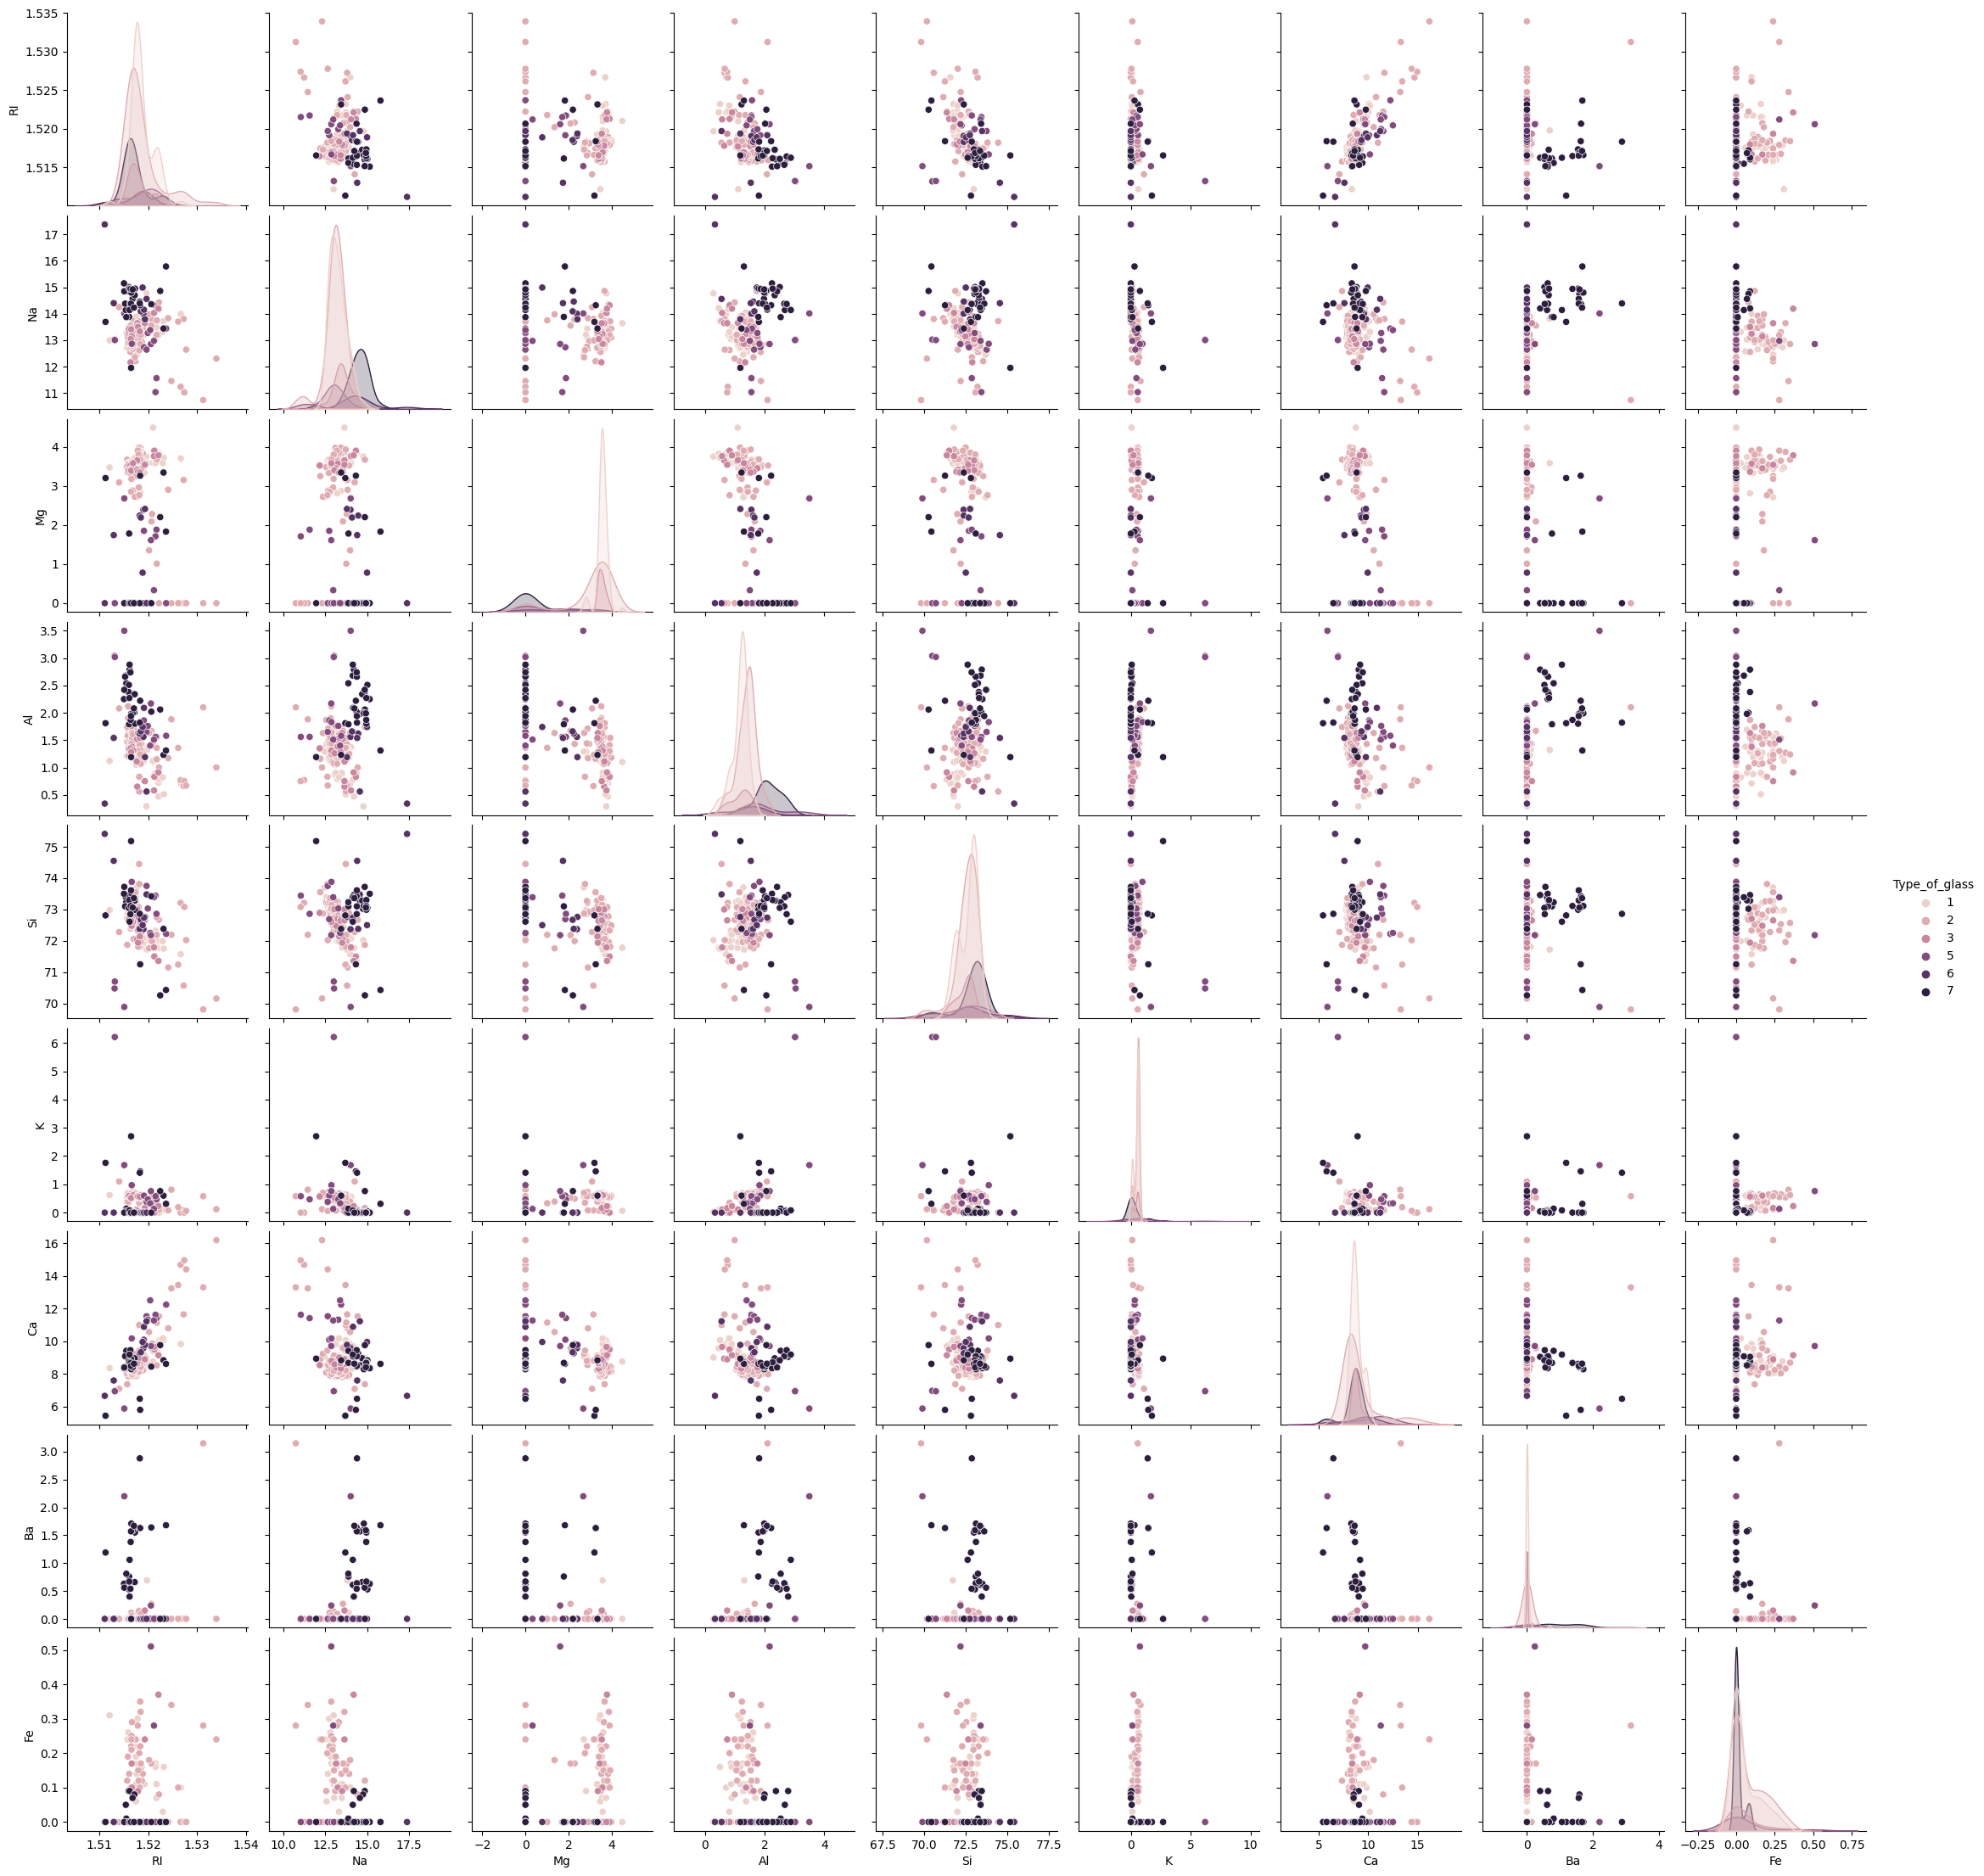

In [13]:
sns.pairplot(df, hue='Type_of_glass', diag_kind='kde')
plt.show()

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [14]:
# Separate features and labels
X = df.drop(columns=['Type_of_glass'])
y = df['Type_of_glass']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [15]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [16]:
# Define the parameter grid
param_grid = {
    'knn__n_neighbors': range(1, 31)
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

C:\Users\ruel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Best Parameters: {'knn__n_neighbors': 1}
Best Cross-Validation Score: 0.7249999999999999


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

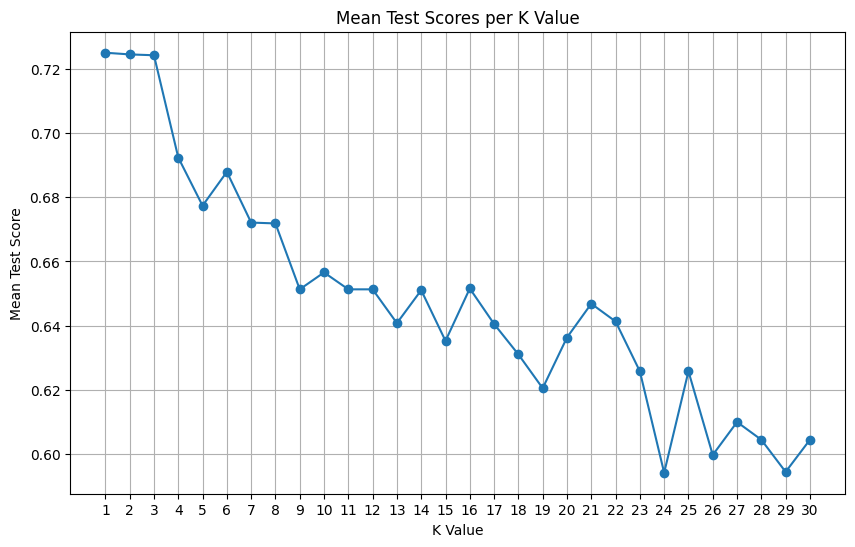

In [18]:
# Extract mean test scores and corresponding K values
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = range(1, 31)  # Assuming K was searched from 1 to 30

# Plot mean test scores per K value
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores per K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Test Score')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.43      0.55         7
           2       0.57      0.50      0.53         8
           3       0.50      1.00      0.67         2
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         3

    accuracy                           0.64        22
   macro avg       0.64      0.82      0.68        22
weighted avg       0.67      0.64      0.63        22



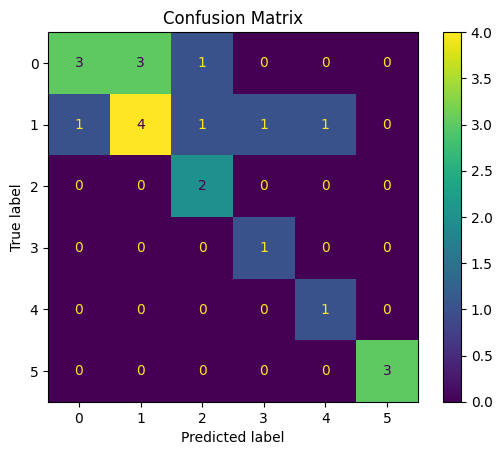

In [17]:
# Predict the labels for the test set
y_pred = grid_search.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()